# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [40]:
# If this cell does not work try running ``

import io
import nbformat

nb = nbformat.read("Lab1.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 819


## Group Number : 27

## Student 1 
### Name : Krzysztof Baran
### ID : 4662148

## Student 2
### Name : Michał Okoń
### ID :

In [41]:
py_version = !python --version
print(py_version[0])
print("+++++++++++++")
import sklearn
print("scikit-learn", sklearn.__version__)
import pandas
print("pandas", pandas.__version__)
import seaborn
print("seaborn", seaborn.__version__)
import matplotlib
print("matplotlib", matplotlib.__version__)
import imblearn
print("imbalanced-learn", imblearn.__version__)
import plotly
print("plotly", plotly.__version__)
import nbformat
print("nbformat", nbformat.__version__)
import statsmodels
print("statsmodels", statsmodels.__version__)
import tensorflow as tf
print("tensorflow", tf.__version__)
import tensorflow_data_validation as tfdv
print("tensorflow_data_validation", tfdv.__version__)

Python 3.9.16
+++++++++++++
scikit-learn 1.0.2
pandas 1.4.2
seaborn 0.11.2
matplotlib 3.5.1
imbalanced-learn 0.9.0
plotly 5.8.0
nbformat 5.4.0
statsmodels 0.13.2
tensorflow 2.12.0
tensorflow_data_validation 1.13.0


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow_data_validation as tfdv
import tensorflow as tf

In [43]:
def col(rgb, text):
    r, g, b = rgb
    return f"\033[38;2;{r};{g};{b}m{text} \033[0m"
print(col((255, 0, 0), "Test"))

Test 


## Data Visualization

In [44]:
# Load the data inside pandas Dataframe
import os

train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

#### Train and Test data

Firstly, it is vital to understand how the Train and Test datasets differ. We start by examining the basic statistics of both datasets, such as the mean, standard deviation, minimum, and maximum values for each feature. We can also visualize the distribution of each feature in both datasets using heat maps, box plots, bar charts and density plots.

In [45]:
train_data_df.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
Id,,,,,,,,,,,,,,
1,GB,mccredit,546097.0,4500.0,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0
2,GB,mcdebit,557349.0,3395.0,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0
3,GB,mccredit,542011.0,3895.0,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0
4,GB,visadebit,465943.0,15345.0,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0
6,GB,visadebit,475127.0,5095.0,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0


In [46]:
test_data_df.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
Id,,,,,,,,,,,,,
0,GB,visadebit,492181.0,1095.0,GBP,GB,Ecommerce,NaN,1,UKAccount,email327589,ip144935,card115008
5,GB,mcdebit,557379.0,5400.0,GBP,GB,Ecommerce,True,1,UKAccount,email273226,ip12784,card20633
7,GB,visaplatinum,492913.0,17510.0,GBP,GB,Ecommerce,True,1,UKAccount,email67749,ip194560,card130375
9,NZ,visadebit,494310.0,15000.0,NZD,NZ,Ecommerce,True,0,APACAccount,email55458,ip130239,card195989
16,AU,mccredit,518868.0,11050.0,AUD,AU,Ecommerce,True,0,APACAccount,email190209,ip31190,card155450


#### **Data analysis**

In this section, we show how we `train` and `test` data look, contain and how they are distributed. To do this in a few lines of code, `tensorflow_data_validation` was used to help with identifying numerical (e.g. `bin`, `amount` and etc.) and catergorical features (e.g. `txvariantcode`, `currencycode` and etc.) and learn some insights from both datasets. This helps us to potentially learn where there future ML models could contain bias. Here are some observations:

- Both datasets have similair distributions per feature meaning that the test set is representative of the train set (only `label` value is not present in test set).
- The `label` i.e. mark that a transaction is not fradulent for 99.85% of times.
- Most of the Validation result of the CVC/CVV2 code (i.e. `cvcresponsecode`) is either matched (1) or unknown (0).
- Columns that contain missing values are `shoppercountrycode`, `cardverificationcodesupplied` and `shoppercountrycode`.
- There is a larger variety of countries of origin of shoppers (`shoppercountrycode`) than  countries where the card was issued (`issuercountrycode`).

In [47]:
train_stats = tfdv.generate_statistics_from_csv(train_data_path, delimiter=',')
test_stats = tfdv.generate_statistics_from_csv(test_data_path, delimiter=',')
tfdv.visualize_statistics(lhs_statistics=train_stats, rhs_statistics=test_stats,
                          lhs_name='TRAIN_DATASET', rhs_name='TEST_DATASET')

In [48]:
schema = tfdv.infer_schema(statistics=train_stats, max_string_domain_size=200)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Id',INT,required,,-
'issuercountrycode',STRING,optional,single,'issuercountrycode'
'txvariantcode',STRING,required,,'txvariantcode'
'bin',FLOAT,required,,-
'amount',FLOAT,required,,-
'currencycode',STRING,required,,'currencycode'
'shoppercountrycode',STRING,optional,single,'shoppercountrycode'
'shopperinteraction',STRING,required,,'shopperinteraction'
'cardverificationcodesupplied',STRING,optional,single,'cardverificationcodesupplied'


,Values
Domain,
'issuercountrycode',"'AE', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BG', 'BH', 'BM', 'BN', 'BR', 'BW', 'BY', 'CA', 'CH', 'CK', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY', 'DE', 'DK', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'GB', 'GE', 'GH', 'GI', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JO', 'JP', 'KE', 'KH', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LK', 'LT', 'LU', 'LV', 'LY', 'MD', 'ME', 'MK', 'MN', 'MO', 'MT', 'MU', 'MX', 'MY', 'NG', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PK', 'PL', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SB', 'SE', 'SG', 'SI', 'SK', 'SL', 'TH', 'TR', 'TW', 'TZ', 'UA', 'US', 'UY', 'VG', 'VN', 'ZA', 'ZM', 'ZW', 'ZZ'"
'txvariantcode',"'electron', 'mc', 'mccredit', 'mcdebit', 'visa', 'visabusiness', 'visaclassic', 'visacorporate', 'visadebit', 'visagold', 'visaplatinum', 'visapurchasing', 'visasignature'"
'currencycode',"'AUD', 'GBP', 'MXN', 'NZD', 'SEK'"
'shoppercountrycode',"'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BG', 'BH', 'BM', 'BN', 'BO', 'BR', 'BS', 'BW', 'BY', 'CA', 'CD', 'CH', 'CI', 'CK', 'CL', 'CN', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DZ', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'GB', 'GD', 'GE', 'GG', 'GH', 'GI', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KH', 'KN', 'KR', 'KW', 'KY', 'KZ', 'LB', 'LC', 'LK', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MK', 'MO', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NG', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PE', 'PH', 'PK', 'PL', 'PR', 'PT', 'QA', 'RO', 'RS', 'RU', 'SA', 'SC', 'SD', 'SE', 'SG', 'SI', 'SK', 'SL', 'TH', 'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UZ', 'VN', 'VU', 'ZA', 'ZM', 'ZW'"
'shopperinteraction',"'ContAuth', 'Ecommerce', 'POS'"
'cardverificationcodesupplied',"'False', 'True'"
'accountcode',"'APACAccount', 'MexicoAccount', 'SwedenAccount', 'UKAccount'"


In [49]:
train_data_df['label'].value_counts()

0    189352
1       276
Name: label, dtype: int64

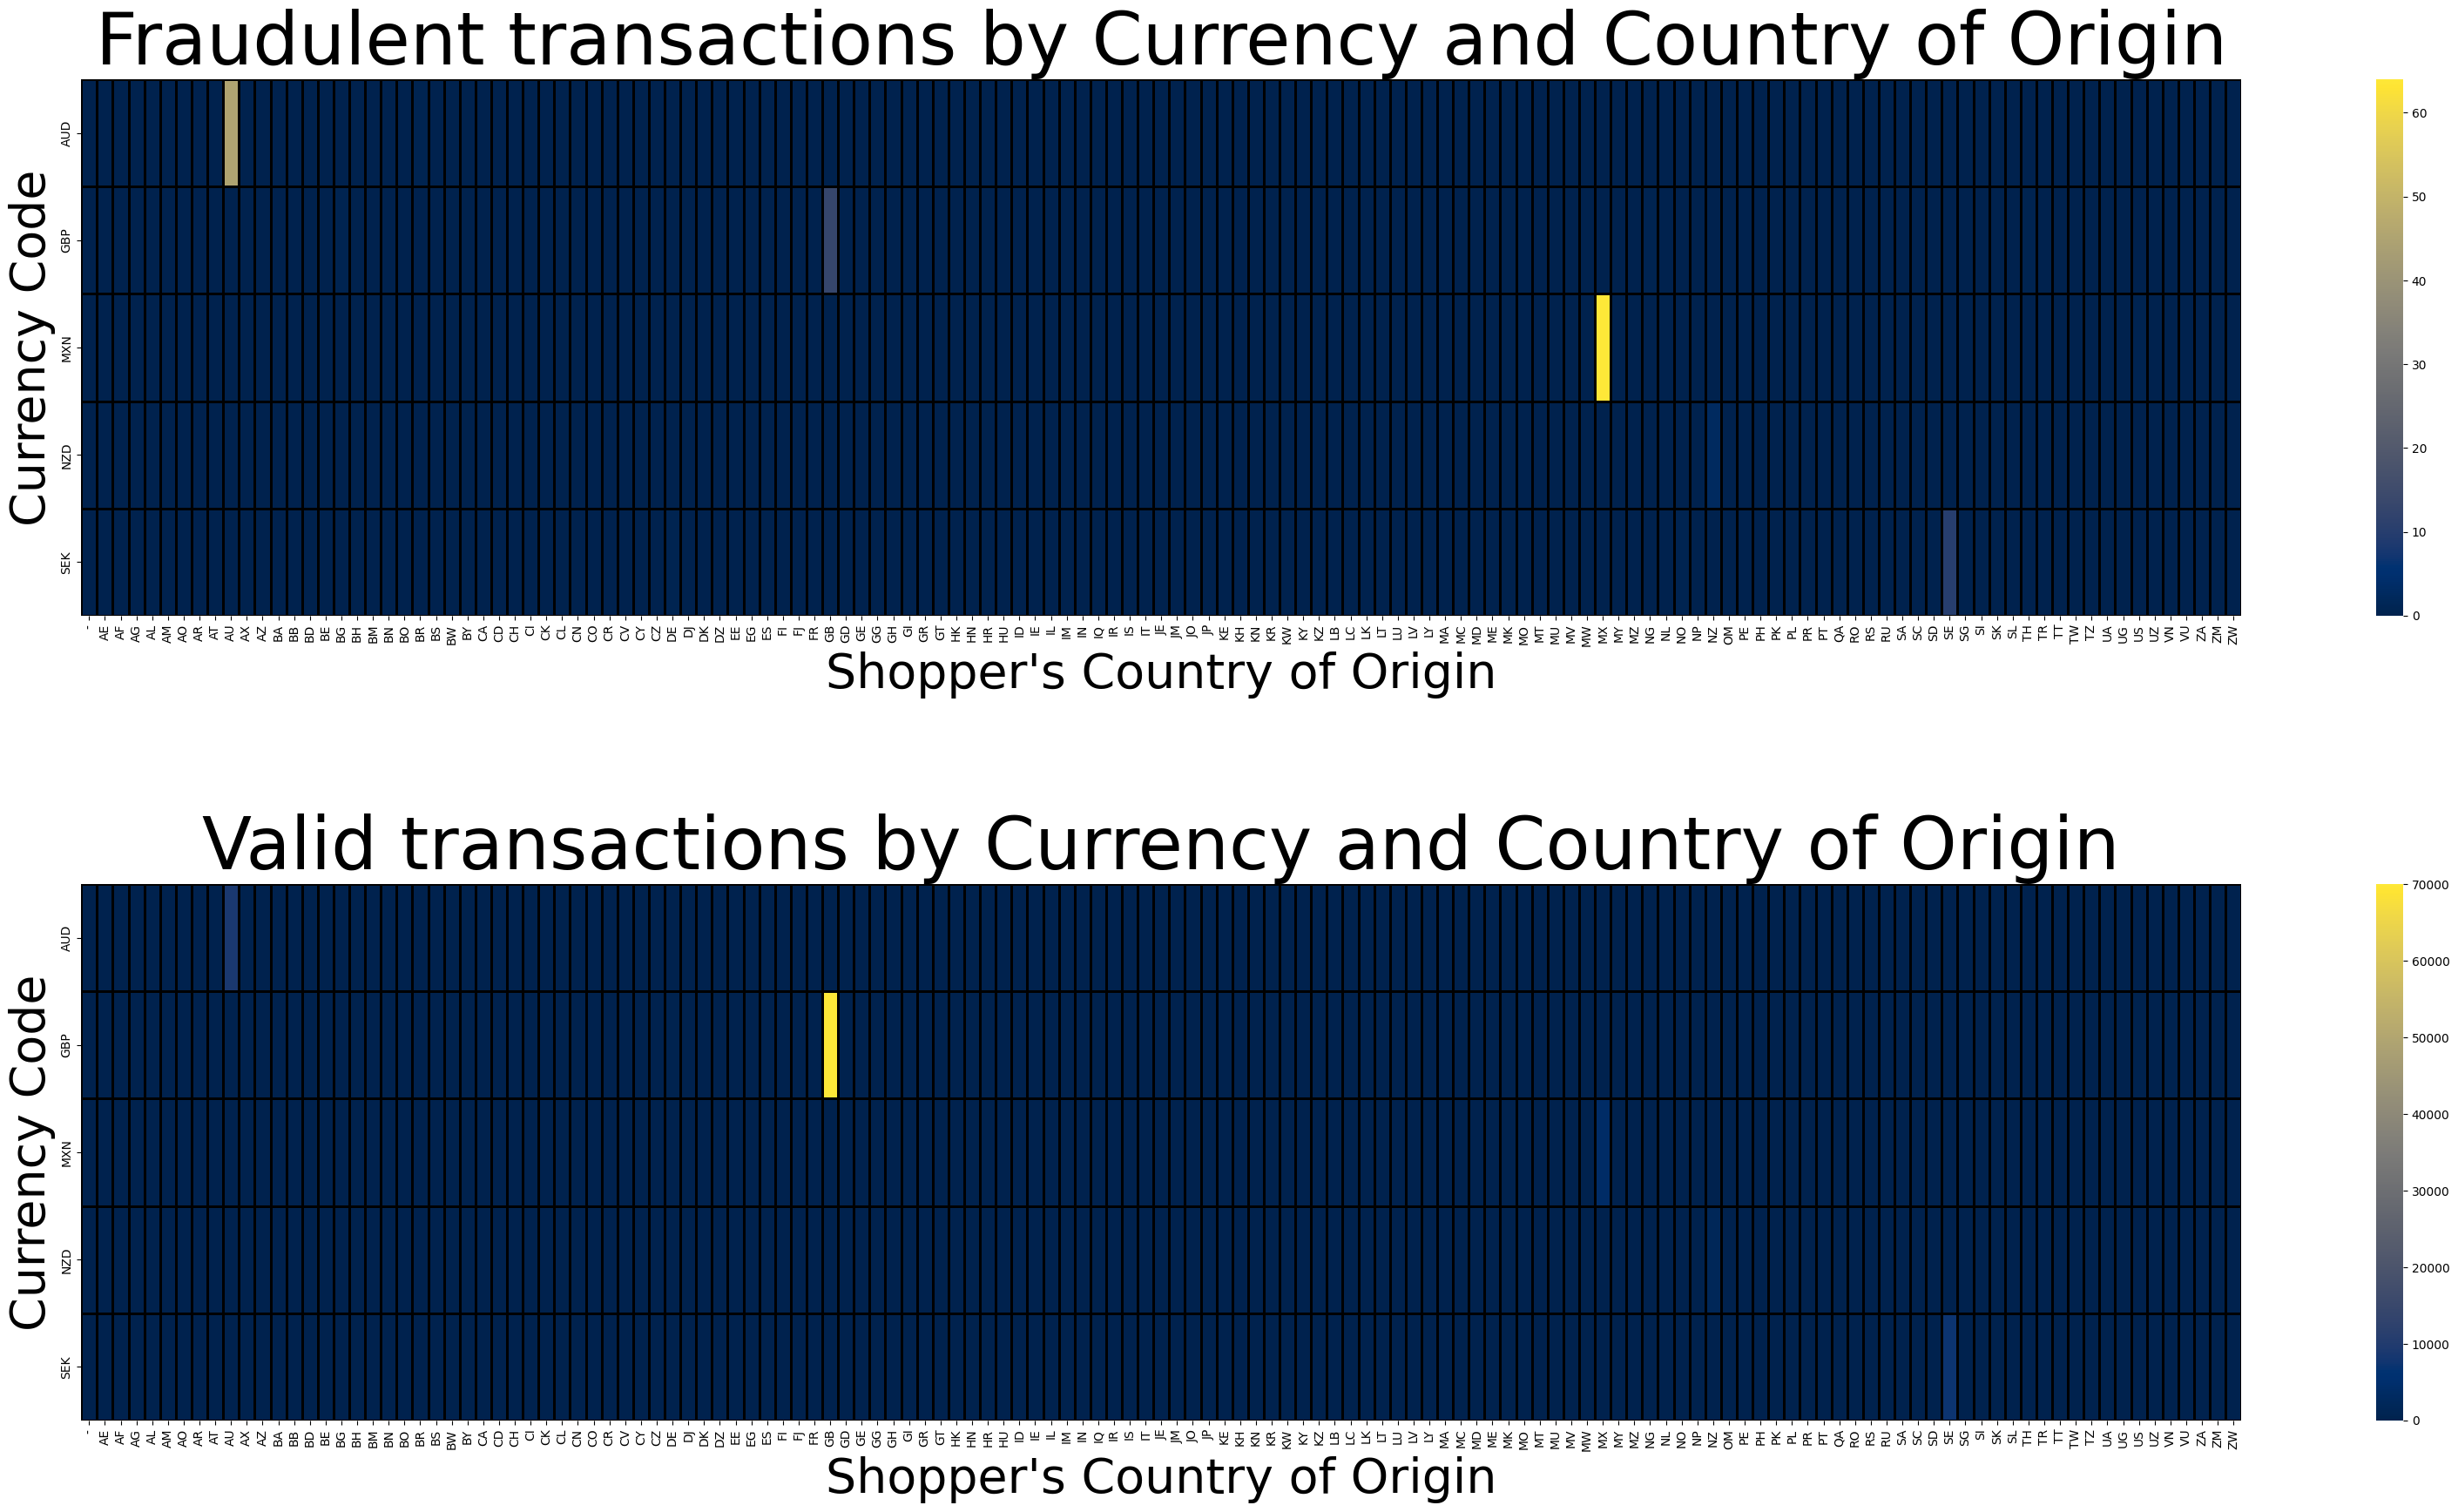

In [50]:
# Amount of fraud by Shopper's origin and currecny used
fraudulent_test_df = train_data_df[['currencycode','shoppercountrycode', 'label']]
fraudulent_test_df.loc[fraudulent_test_df['shoppercountrycode'].isna(),'shoppercountrycode'] = '-'
fraudulent_test_df.reset_index(drop=True, inplace=True)

counts_df = fraudulent_test_df.groupby(['shoppercountrycode','currencycode', 'label']).size().reset_index().rename(columns={0:'count'})

fraud_df = counts_df.copy(deep=True)
fraud_df.loc[fraud_df['label'] == 0, 'count'] = 0
fraud_df = fraud_df[['shoppercountrycode','currencycode', 'count']]


valid_df = counts_df.copy(deep=True)
valid_df.loc[counts_df['label'] == 1, 'count'] = 0
valid_df = valid_df[['shoppercountrycode','currencycode', 'count']]


fraud_df = fraud_df.pivot_table(index='currencycode', columns='shoppercountrycode', values='count').fillna(0)
valid_df = valid_df.pivot_table(index='currencycode', columns='shoppercountrycode', values='count').fillna(0)

fig, (ax1, ax2) = plt.subplots(2,1,figsize =(40, 20))
fig.subplots_adjust(hspace=0.5)

sns.heatmap(fraud_df, linewidths=1, linecolor='black', cmap='cividis', ax=ax1)
ax1.set_xlabel("Shopper's Country of Origin", fontsize=40)
ax1.set_ylabel("Currency Code", fontsize=40)
ax1.set_title('Fraudulent transactions by Currency and Country of Origin', fontsize=60)

sns.heatmap(valid_df, linewidths=1, linecolor='black', cmap='cividis', ax=ax2)
ax2.set_xlabel("Shopper's Country of Origin", fontsize=40)
ax2.set_ylabel("Currency Code", fontsize=40)
ax2.set_title('Valid transactions by Currency and Country of Origin', fontsize=60)

plt.show()

In [51]:
def autolabel(rects, axies):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        axies.text(rect.get_x() + rect.get_width()/2., 1.*height, f'{height:.4f}', ha='center', va='bottom')

#### **Frad by Currency**

The bar chart shows that for a given currency, what is the chance that the transaction will be fraudulent. It shows that transactions with Mexican Pesos (MXN) have the highest chance to be used in a fraudulent transaction. Albeit, it is still very small percentage of 1.59%. Others have less or equal change of 0.5%.

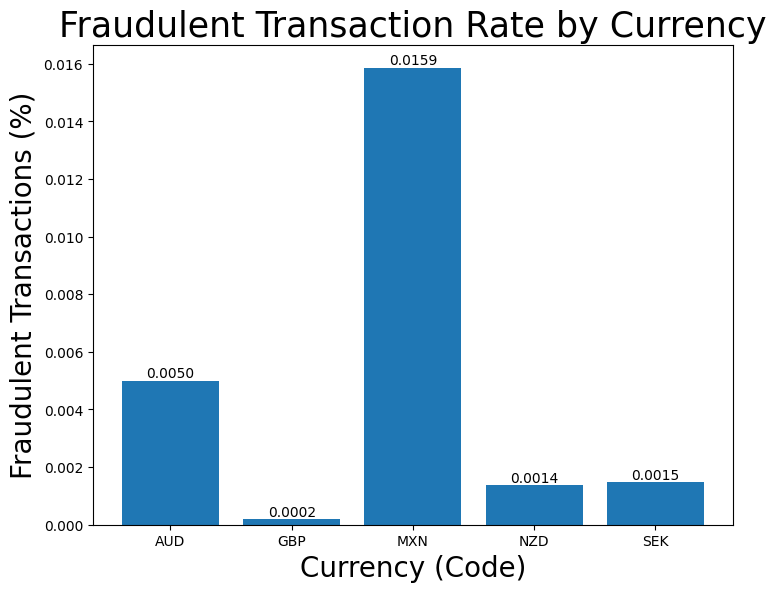

In [52]:
# Group by currency type and plot the mean of the label
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mean_fraud = train_data_df.groupby('currencycode')['label'].mean()
bars_rects = ax.bar(mean_fraud.index, mean_fraud.values)
ax.set_ylabel('Fraudulent Transactions (%)', fontsize=20)
ax.set_xlabel('Currency (Code)', fontsize=20)
ax.set_title('Fraudulent Transaction Rate by Currency', fontsize=25)
autolabel(bars_rects, ax)
plt.show()

#### **Frad by Shoppers Origin**

The bar chart shows that for a given shopeper's country of origin, what is the chance that the transaction will be fraudulent. It shows that transactions from Brazil have the highest chance of being fraulent with 6.67% chance. Out of 136 countries, only 12 countries had fraudlent transactions.

<Figure size 10000x2000 with 0 Axes>

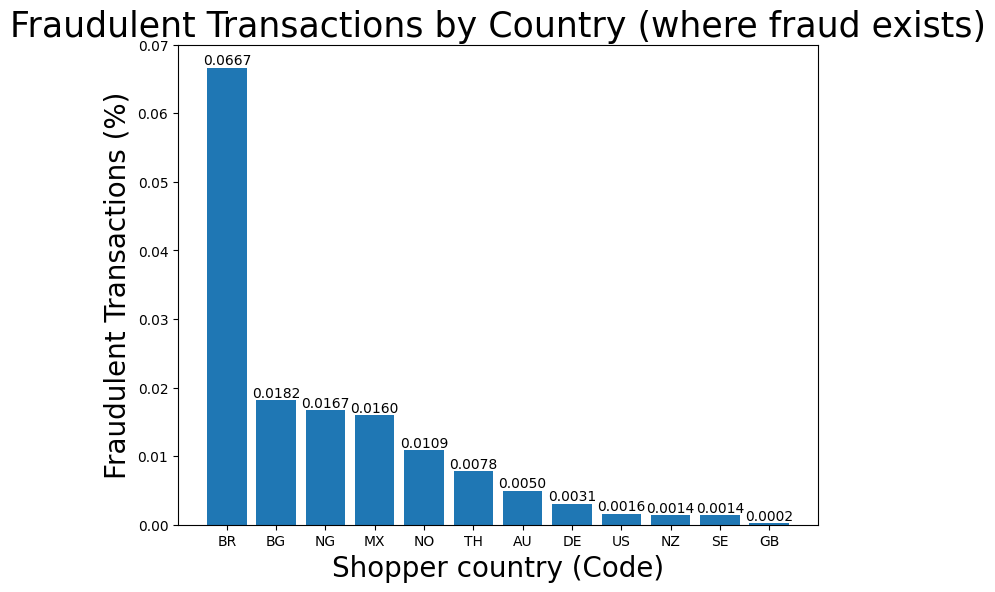

In [53]:
plt.figure(figsize=(100, 20))
fraudulent_mean_data = train_data_df.groupby('shoppercountrycode')['label'].mean()
fraudulent_mean_data = pd.DataFrame(fraudulent_mean_data).reset_index()
fraudulent_mean_data = fraudulent_mean_data[fraudulent_mean_data['label'] > 0.0]
fraudulent_mean_data = fraudulent_mean_data.sort_values(ascending=False, by='label')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
contries = fraudulent_mean_data['shoppercountrycode'].to_list()
mean_fraud = fraudulent_mean_data['label'].to_list()
bars_rects = ax.bar(contries,mean_fraud)
ax.set_ylabel('Fraudulent Transactions (%)', fontsize=20)
ax.set_xlabel('Shopper country (Code)', fontsize=20)
ax.set_title('Fraudulent Transactions by Country (where fraud exists)', fontsize=25)
autolabel(bars_rects, ax)
plt.show()

#### **Amount of money for transactions**

Here the amount of money for a transaction is investigated against the fraudulence label. To do that, Histogram and Box Plot were used. Before that, since the money is in different currencies, we decided to convert them to Euro by using Python's pip package `currency_converter` and used the 02/01/2023 day for the conversion rates. From both graphs we can see that valid transations have much more variety in amount with more outliers of large amounts while fradulent transactions seem to be in a smaller range but higher median than valid transactions.

In [54]:
from datetime import date # datetime works too
from currency_converter import CurrencyConverter
c = CurrencyConverter()

def conv(row, data_conv=date(2023, 1, 2)):
    return c.convert(row['amount'], row['currencycode'], 'EUR', date=data_conv)

converted_train_df = train_data_df.copy(deep=True)
converted_train_df['amount_eur'] = converted_train_df.apply(lambda x: conv(x), axis=1)
converted_train_df.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label,amount_eur
Id,,,,,,,,,,,,,,,
1,GB,mccredit,546097.0,4500.0,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0,5077.287600
2,GB,mcdebit,557349.0,3395.0,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0,3830.531423
3,GB,mccredit,542011.0,3895.0,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0,4394.674489
4,GB,visadebit,465943.0,15345.0,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0,17313.550716
6,GB,visadebit,475127.0,5095.0,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0,5748.617849


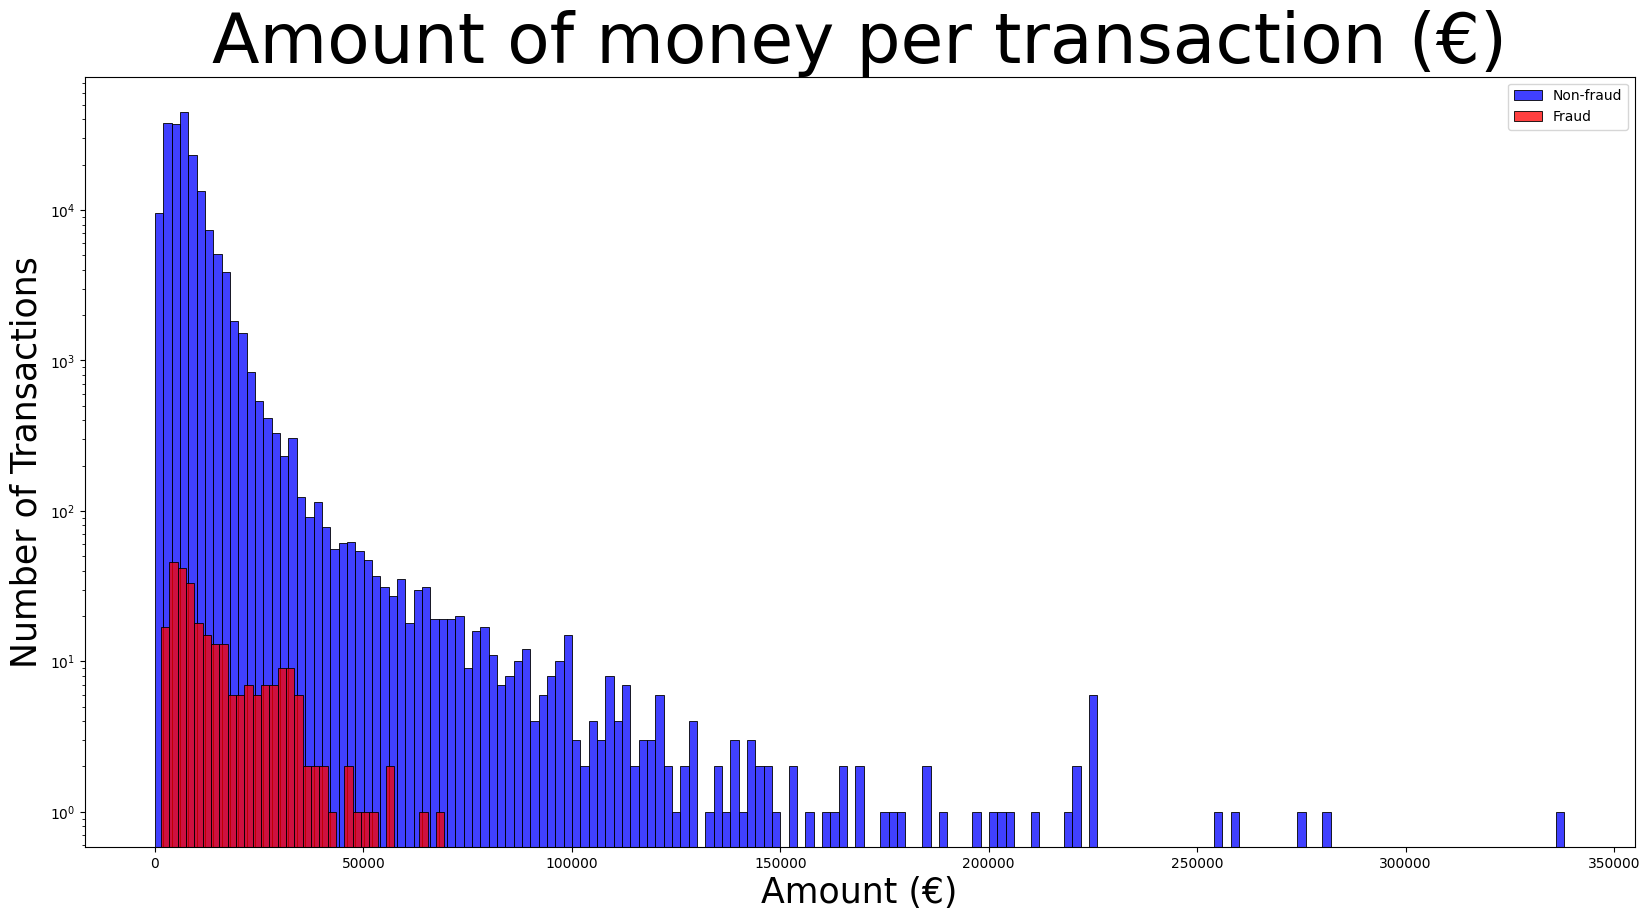

In [55]:
# Plot the distribution of the amount depending on the label
df_amount_fraud = converted_train_df[converted_train_df['label'] == 1]['amount_eur']
df_amount_non_fraud = converted_train_df[converted_train_df['label'] == 0]['amount_eur']
plt.figure(figsize=(20, 10))
sns.histplot(df_amount_non_fraud, color='blue', label='Non-fraud', log_scale=(False, True), binwidth=2000)
sns.histplot(df_amount_fraud, color='red', label='Fraud', log_scale=(False, True), binwidth=2000)
plt.title('Amount of money per transaction (€)', fontsize=50)
plt.ylabel('Number of Transactions', fontsize=25)
plt.xlabel('Amount (€)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

In [56]:
df_amount_fraud.max()

68912.71056661563

In [57]:
df_amount_fraud.min()

1435.3056384949932

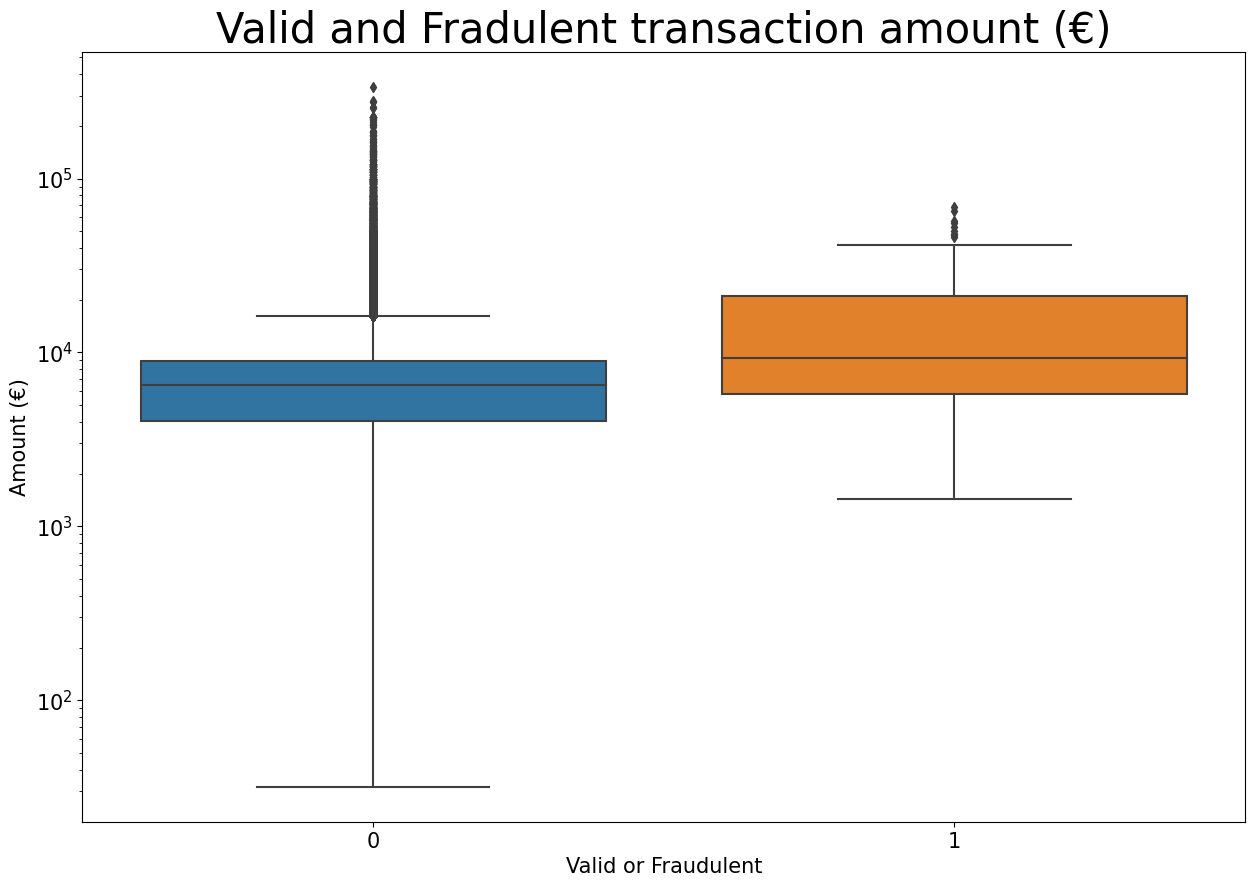

In [58]:
# Create a boxplot of the log of amount depending on the label converted_train_df['amount_eur']
plt.figure(figsize=(15, 10))
sns.boxplot(x='label', y=converted_train_df['amount_eur'], data=converted_train_df)
plt.title('Valid and Fradulent transaction amount (€)', fontsize=30)
plt.ylabel('Amount (€)', fontsize=15)
plt.xlabel("Valid or Fraudulent", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.show()

#### **Correlation between shopper's country of origin and issuer country**

From the bar charts below we can see that a difference between shopper's country of origin and issuer country has a very negledgable increase of fraudulence. 

In [59]:
buyer_with_same_issuer_df = train_data_df[train_data_df['issuercountrycode'] == train_data_df['shoppercountrycode']]
buyer_with_diff_issuer_df = train_data_df[train_data_df['issuercountrycode'] != train_data_df['shoppercountrycode']]

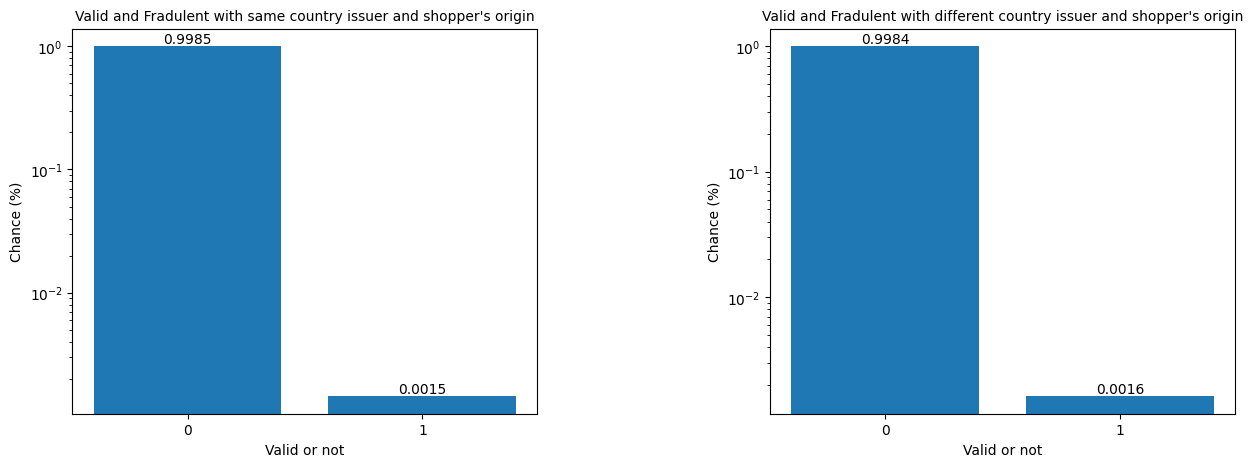

In [60]:
same_code_sr = buyer_with_same_issuer_df["label"].value_counts(normalize=True)
diff_code_sr = buyer_with_diff_issuer_df["label"].value_counts(normalize=True)

fig, (ax1, ax2) = plt.subplots(1,2,figsize =(15, 5))
fig.subplots_adjust(wspace=0.5)

fraud_or_not = same_code_sr.index
percentage_chance = same_code_sr.values
bars_rects = ax1.bar(fraud_or_not, percentage_chance)
ax1.set_ylabel('Chance (%)', fontsize=10)
ax1.set_xlabel("Valid or not", fontsize=10)
ax1.set_title("Valid and Fradulent with same country issuer and shopper's origin", fontsize=10)

autolabel(bars_rects, ax1)
ax1.set_yscale('log')
ax1.set_xticks(np.arange(min(fraud_or_not), max(fraud_or_not)+1, 1.0))


fraud_or_not = diff_code_sr.index
percentage_chance = diff_code_sr.values
bars_rects = ax2.bar(fraud_or_not, percentage_chance)
ax2.set_ylabel('Chance (%)', fontsize=10)
ax2.set_xlabel("Valid or not", fontsize=10)
ax2.set_title("Valid and Fradulent with different country issuer and shopper's origin", fontsize=10)

autolabel(bars_rects, ax2)
ax2.set_xticks(np.arange(min(fraud_or_not), max(fraud_or_not)+1, 1.0))
ax2.set_yscale('log')
plt.show()

#### **Data preprocessing pipeline**

Before we can train our models, we need to preprocess it.

In [61]:
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin, BaseEstimator


def country_equal_feature_eng(df):
    df['countries_equal'] = (df['shoppercountrycode'] == df['issuercountrycode'])
    df.loc[df['countries_equal'] == False, 'countries_equal'] = 0
    df.loc[df['countries_equal'] == True, 'countries_equal'] = 1
    return df


class CustomDataTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, currency_conv_func, feature_engineering_func=None):
        self.card_enc = LabelEncoder()
        self.ip_enc = LabelEncoder()
        self.country_code_enc = LabelEncoder()
        self.tx_variant_code_enc = LabelEncoder()
        self.currency_code_enc = LabelEncoder()
        self.shopper_interaction_enc = LabelEncoder()
        self.account_code_enc = LabelEncoder()
        self.card_verif_code_supplied = LabelEncoder()
        self.mail_id_enc = LabelEncoder()

        self.currency_conv_func = currency_conv_func
        self.feature_eng_func = feature_engineering_func

        self.country_codes = None
        self.cleaned_data = None

    def _clean_data(self, df):
        # Cleaning up data inconsisstencies
        df.loc[df['cardverificationcodesupplied'].isna(), 'cardverificationcodesupplied'] = False
        df.loc[df['mail_id'].str.contains('na', case=False), 'mail_id'] = 'email99999'
        df.loc[df['cvcresponsecode'] > 2, 'cvcresponsecode'] = 3

        df.loc[df['issuercountrycode'].isna(), 'issuercountrycode'] = '--'
        df.loc[df['shoppercountrycode'].isna(), 'shoppercountrycode'] = '--'
        unique_issuer_cc = df['issuercountrycode'].unique()
        unique_shopper_cc = df['shoppercountrycode'].unique()
        both = np.append(unique_issuer_cc, unique_shopper_cc)
        df_countrycodes = pd.DataFrame(both)
        unique_country_codes = df_countrycodes[0].unique()
        self.country_codes = unique_country_codes

        df['amount_eur'] = df.apply(lambda x: self.currency_conv_func(x), axis=1)
        df['accountcode'] = df['accountcode'].apply(lambda x: re.sub('Account','',x))
        df.loc[(df['accountcode'] == 'UK'),'accountcode'] = 'GB'
        df.loc[(df['accountcode'] == 'Mexico'),'accountcode'] = 'MX'
        df.loc[(df['accountcode'] == 'Sweden'),'accountcode'] = 'SE'
        df.loc[(df['accountcode'] == 'APAC'),'accountcode'] = 'APAC'

        # Feature Engineering
        if self.feature_eng_func is not None:
            df = self.feature_eng_func(df)
        return df

    def fit(self, X, y=None):
        df = X.copy(deep=True)
        df = self._clean_data(df)

        # 1.Card ID
        self.card_enc.fit(df['card_id'])

        # 2.IP ID
        self.ip_enc.fit(df['ip_id'])

        # 3. Country code
        self.country_code_enc.fit(self.country_codes)

        # 4. TX variant code
        self.tx_variant_code_enc.fit(df['txvariantcode'])

        # 5. Currency code
        self.currency_code_enc.fit(df['currencycode'])

        # 6. Shopper Interaction
        self.shopper_interaction_enc.fit(df['shopperinteraction'])

        # 7. Account code
        self.account_code_enc.fit(df['accountcode'])
        df['accountcode'] = self.account_code_enc.transform(df.accountcode)

        # 8. Card Verification Code Supplied
        self.card_verif_code_supplied.fit(df['cardverificationcodesupplied'])
        df['cardverificationcodesupplied'] = self.card_verif_code_supplied.transform(
            df.cardverificationcodesupplied
        )

        # 9. Email ID
        self.mail_id_enc.fit(df['mail_id'])
        df['mail_id'] = self.mail_id_enc.transform(df.mail_id)

        return self

    def transform(self, X):
        df = X.copy(deep=True)
        df = self._clean_data(df)
        # 1.Card ID
        df['card_id'] = self.card_enc.transform(df.card_id)

        # 2.IP ID
        df['ip_id'] = self.ip_enc.transform(df.ip_id)

        # 3. Country code
        df['issuercountrycode'] = self.country_code_enc.transform(df.issuercountrycode)
        df['shoppercountrycode'] = self.country_code_enc.transform(df.shoppercountrycode)

        # 4. TX variant code
        df['txvariantcode'] = self.tx_variant_code_enc.transform(df.txvariantcode)

        # 5. Currency code
        df['currencycode'] = self.currency_code_enc.transform(df.currencycode)

        # 6. Shopper Interaction
        df['shopperinteraction'] = self.shopper_interaction_enc.transform(
            df.shopperinteraction
        )

        # 7. Account code
        df['accountcode'] = self.account_code_enc.transform(df.accountcode)

        # 8. Card Verification Code Supplied
        df['cardverificationcodesupplied'] = self.card_verif_code_supplied.transform(
            df.cardverificationcodesupplied
        )

        # 9. Email ID
        df['mail_id'] = self.mail_id_enc.transform(df.mail_id)

        return df

In [62]:
# create a pipeline object
pipeline = Pipeline([
    ('custom_transform', CustomDataTransformer(conv, feature_engineering_func=country_equal_feature_eng)),  # apply the custom function
])

# fit the pipeline to your data and transform it
transformed_data_df = pipeline.fit_transform(train_data_df)
transformed_data_df

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label,amount_eur,countries_equal
Id,,,,,,,,,,,,,,,,
1,50,2,546097.0,4500.0,1,50,1,1,1,1,17805,12538,105460,0,5077.287600,1
2,50,3,557349.0,3395.0,1,50,1,1,1,1,115620,107432,29882,0,3830.531423,1
3,50,2,542011.0,3895.0,1,50,1,1,1,1,84651,87293,123743,0,4394.674489,1
4,50,8,465943.0,15345.0,1,50,0,0,0,1,99845,147089,14712,0,17313.550716,1
6,50,8,475127.0,5095.0,1,50,1,1,1,1,122624,56390,75841,0,5748.617849,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237030,50,2,522948.0,10900.0,1,50,1,1,1,1,98176,111864,159778,0,12298.318854,1
237031,50,8,475128.0,1895.0,1,50,1,1,1,1,154237,163508,83649,0,2138.102223,1
237032,50,8,475130.0,3195.0,1,50,1,1,1,1,71272,144408,4558,0,3604.874196,1


In [63]:
# create a pipeline object with scaling
scale_pipeline = Pipeline([
    ('custom_transform', CustomDataTransformer(conv, feature_engineering_func=country_equal_feature_eng)),  # apply the custom function
    ('scaler', StandardScaler()),  # standardize the data
])

# fit the pipeline to your data and transform it
scaled_data = scale_pipeline.fit_transform(train_data_df)
print(f"Size: {scaled_data.shape}")
scaled_data

Size: (189628, 16)


array([[-0.20504415, -1.66721083,  1.70021127, ..., -0.03817856,
        -0.3685056 ,  0.1733803 ],
       [-0.20504415, -1.29012909,  2.01371459, ..., -0.03817856,
        -0.55193108,  0.1733803 ],
       [-0.20504415, -1.66721083,  1.5863671 , ..., -0.03817856,
        -0.46893313,  0.1733803 ],
       ...,
       [-0.20504415,  0.59527961, -0.27707186, ..., -0.03817856,
        -0.58513027,  0.1733803 ],
       [-0.20504415,  0.59527961, -0.27707186, ..., -0.03817856,
         0.19505052,  0.1733803 ],
       [-1.63708174, -1.66721083,  1.02126985, ..., -0.03817856,
        -0.07994351,  0.1733803 ]])

In [64]:
# create a pipeline object with scaling and PCA
pipeline_pca = Pipeline([
    ('custom_transform', CustomDataTransformer(conv, feature_engineering_func=country_equal_feature_eng)),  # apply the custom function
    ('scaler', StandardScaler()),  # standardize the data
    ('pca', PCA(n_components=3)),  # reduce the dimensionality to 3 using PCA
])

# fit the pipeline to your data and transform it
transformed_pca_data = pipeline_pca.fit_transform(train_data_df)
print(f"Size: {transformed_pca_data.shape}")
transformed_pca_data

Size: (189628, 3)


array([[-0.01690627,  1.51665268, -1.67752397],
       [-0.06796102,  1.46827371, -1.59275606],
       [-0.06218374,  1.45586888, -1.60875757],
       ...,
       [-0.54148597, -0.86620065, -0.1170803 ],
       [-0.47110563, -0.75736458, -0.1333757 ],
       [-2.74722091,  2.67795795, -1.1428517 ]])

### **Training Models and plotting results**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

def train_classifier_and_plot(classifier, X_train_data, X_test_data, y_train_data, y_test_data):
    classifier.fit(X_train_data, y_train_data)

    y_predictions = classifier.predict(X_test_data)
    y_predictions_proba = classifier.predict_proba(X_test_data)[:, 1]

    print(classification_report(y_test_data, y_predictions))
    print(f"Accuracy: {accuracy_score(y_test_data, y_predictions) * 100:.2f}")

    fpr, tpr, _ = roc_curve(y_test_data, y_predictions_proba)
    roc_auc = auc(fpr, tpr)

    ConfusionMatrixDisplay.from_predictions(y_test_data, y_predictions)
    plt.show()
    return fpr, tpr, roc_auc

def plot_roc_curves(plot_title, *plot_tuples):
    plt.figure(0).clf()
    for plot_tuple in plot_tuples:
        plt.plot(plot_tuple[0], plot_tuple[1], label=plot_tuple[2])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(plot_title)
    plt.legend()
    plt.show()

In [66]:
from sklearn.model_selection import train_test_split

X = transformed_data_df.drop(['label'], axis=1)
y = transformed_data_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37862
           1       0.00      0.00      0.00        64

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926

Accuracy: 99.83


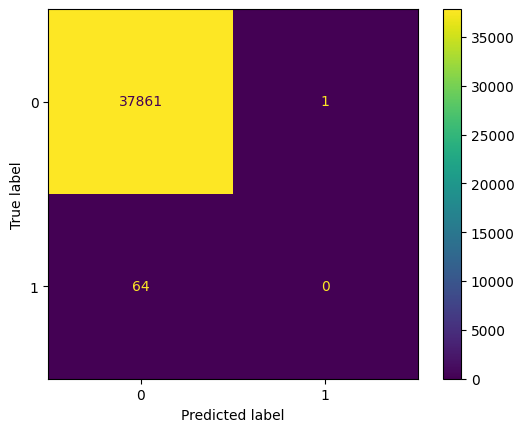

In [67]:
logreg_classifier = LogisticRegression(random_state=0, n_jobs=-1)
logreg_fpr, logreg_tpr, logreg_roc_auc = train_classifier_and_plot(logreg_classifier, X_train, X_test, y_train, y_test)

#### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37862
           1       0.25      0.09      0.14        64

    accuracy                           1.00     37926
   macro avg       0.62      0.55      0.57     37926
weighted avg       1.00      1.00      1.00     37926

Accuracy: 99.80


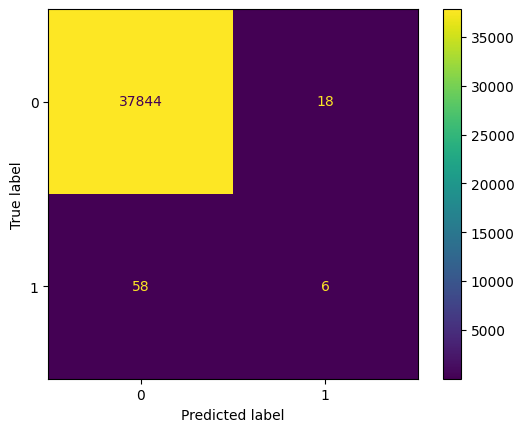

In [68]:
dtree_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree_fpr, dtree_tpr, dtree_roc_auc = train_classifier_and_plot(dtree_classifier, X_train, X_test, y_train, y_test)

#### Random Forest

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37862
           1       0.00      0.00      0.00        64

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926

Accuracy: 99.83


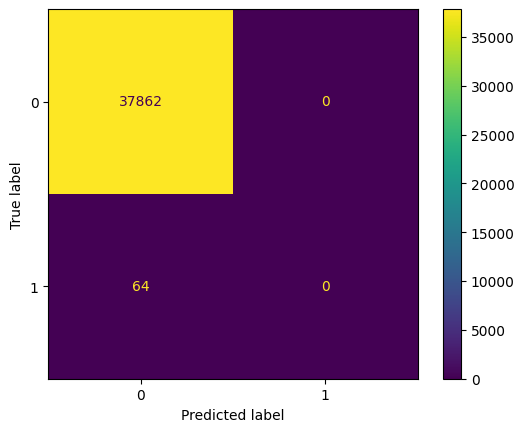

In [69]:
forest_classifier = RandomForestClassifier(random_state=0, n_jobs=-1)
forest_fpr, forest_tpr, forest_roc_auc = train_classifier_and_plot(forest_classifier, X_train, X_test, y_train, y_test)

#### **ROC curve**

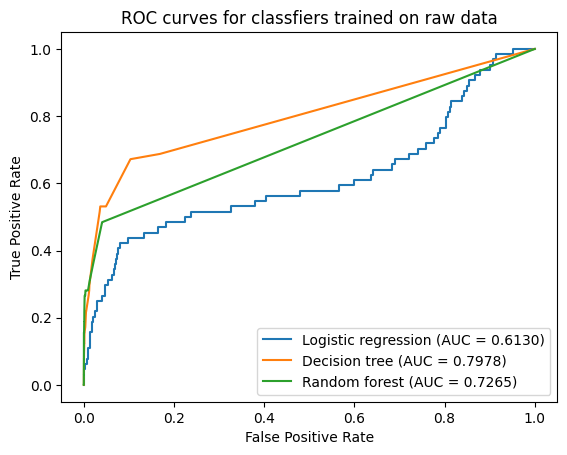

In [70]:
plot_roc_curves(
    "ROC curves for classfiers trained on raw data",
    (logreg_fpr, logreg_tpr, f"Logistic regression (AUC = {logreg_roc_auc:.4f})"),
    (dtree_fpr, dtree_tpr, f"Decision tree (AUC = {dtree_roc_auc:.4f})"),
    (forest_fpr, forest_tpr, f"Random forest (AUC = {forest_roc_auc:.4f})")
)

## 2. Imbalance task

### Author: Krzysztof Baran

#### **SMOTE implementation**

In [71]:
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors

def nearest_neighbours(data_in, k=5):
    kNN = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto').fit(data_in)
    indices = kNN.kneighbors(data_in, return_distance=False)
    return indices

example_np = [[0.0,1.0,3.2], [3.4,0.2,1.1], [0.6,1.0,1.0]]

ind_matrix = nearest_neighbours(example_np, k=3)
ind_matrix

array([[0, 2, 1],
       [1, 2, 0],
       [2, 0, 1]])

In [72]:
import random

def smote_custom(train_data_df, k=5, sample_num=100, random_state=None):
    kNN_matrix = nearest_neighbours(train_data_df, k=k)
    rng = random.Random() if random_state is None else random.Random(random_state)

    X = train_data_df.to_numpy()

    X_new = []

    for i, x_sample in enumerate(X):
        for _ in range(sample_num):
            rand_nn = rng.randrange(1, k)

            nn_point = X[kNN_matrix[i][rand_nn]]

            diff = nn_point - x_sample
            gap = rng.uniform(0, 1)

            new_data_point = x_sample + gap * diff
            X_new.append(new_data_point)
    X_new = np.array(X_new)
    genereated_samples_df = pd.DataFrame(X_new, columns=train_data_df.columns)
    return genereated_samples_df

#### **Data Division**

In [73]:
import time
from sklearn.model_selection import train_test_split

X = transformed_data_df.drop(['label'], axis=1)
y = transformed_data_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_fraud = X_train.loc[y_train == 1]

# X_train = X_train.to_numpy().astype('float')
# X_test = X_test.to_numpy().astype('float')

# y_train = y_train.to_numpy()
# y_train = np.expand_dims(y_train, axis=1)
# y_test = y_test.to_numpy()
# y_test = np.expand_dims(y_test, axis=1)

start = time.time()
X_fraud_smote = smote_custom(X_train_fraud.copy(), sample_num=750, random_state=0)
smote_time = time.time() - start

print(f'SMOTE time: {smote_time:.4f}')

X_fraud_smote.head()

SMOTE time: 1.7802


,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,amount_eur,countries_equal
0,40.318176,7.273863,464041.407108,14513.409746,0.757954,40.318176,0.242046,0.242046,0.0,0.757954,62140.252193,27894.138326,110005.541376,14234.760358,1.0
1,11.619375,5.121453,431172.670333,17813.77186,0.040484,11.619375,0.959516,0.959516,0.0,0.040484,67461.727367,32053.31206,140962.220535,11613.601478,1.0
2,26.197365,6.214802,447868.842705,16137.302968,0.404934,26.197365,0.595066,0.595066,0.0,0.404934,64758.603503,29940.596805,125237.306771,12945.058807,1.0
3,104.8444,7.9034,481988.579124,24968.159963,2.9034,104.8444,1.0,1.0,0.0,0.0,93725.170464,24657.86484,156675.321727,14812.260734,1.0
4,67.17144,6.750146,461067.400733,22200.350684,1.750146,67.17144,1.0,1.0,0.0,0.0,83412.389972,27688.616001,151127.786211,13482.979233,1.0


In [74]:
from sklearn.utils import shuffle

before_smote_valid = len(y_train[y_train == 0])
before_smote_fraud = len(y_train[y_train == 1])

X_train = pd.concat([X_train, X_fraud_smote])
y_train = pd.concat([
    y_train,
    pd.Series(1, index=range(len(X_fraud_smote)))
])

X_train, y_train = shuffle(X_train, y_train, random_state=0)

after_smote_valid = len(y_train[y_train == 0])
after_smote_fraud = len(y_train[y_train == 1])

results_smote_matrix = pd.DataFrame([
    ["before", before_smote_valid, before_smote_fraud],
    ["after", after_smote_valid, after_smote_fraud]],
    columns=["SMOTE", "valid", "fraud"])
results_smote_matrix.set_index('SMOTE', inplace=True)
results_smote_matrix

,valid,fraud
SMOTE,,
before,151490,212
after,151490,159212


#### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     37862
           1       0.01      0.66      0.02        64

    accuracy                           0.89     37926
   macro avg       0.50      0.77      0.48     37926
weighted avg       1.00      0.89      0.94     37926

Accuracy: 88.77


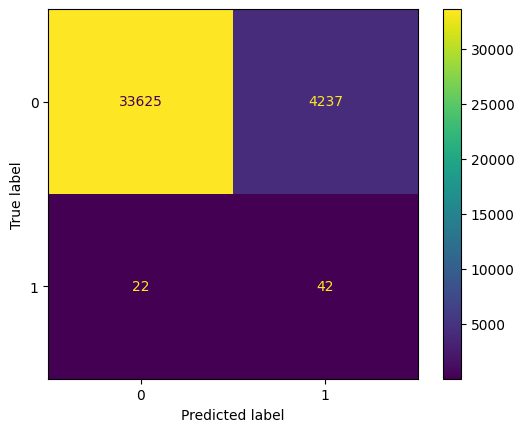

In [75]:
logreg_classifier = LogisticRegression(random_state=0, n_jobs=-1)
logreg_fpr, logreg_tpr, logreg_roc_auc = train_classifier_and_plot(logreg_classifier, X_train, X_test, y_train, y_test)

#### Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     37862
           1       0.02      0.59      0.04        64

    accuracy                           0.96     37926
   macro avg       0.51      0.78      0.51     37926
weighted avg       1.00      0.96      0.98     37926

Accuracy: 95.72


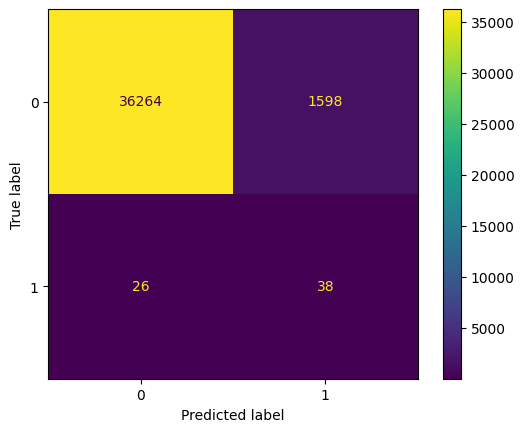

In [76]:
dtree_classifier = DecisionTreeClassifier(max_depth=10, random_state=0)
dtree_fpr, dtree_tpr, dtree_roc_auc = train_classifier_and_plot(dtree_classifier, X_train, X_test, y_train, y_test)

#### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37862
           1       0.13      0.08      0.10        64

    accuracy                           1.00     37926
   macro avg       0.57      0.54      0.55     37926
weighted avg       1.00      1.00      1.00     37926

Accuracy: 99.76


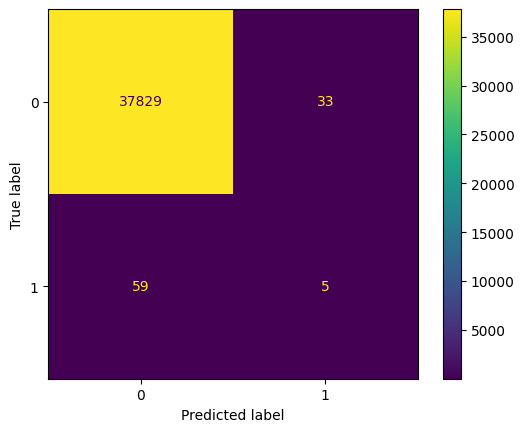

In [77]:
forest_classifier = RandomForestClassifier(random_state=0, n_jobs=-1)
forest_fpr, forest_tpr, forest_roc_auc = train_classifier_and_plot(forest_classifier, X_train, X_test, y_train, y_test)

#### **ROC curve**

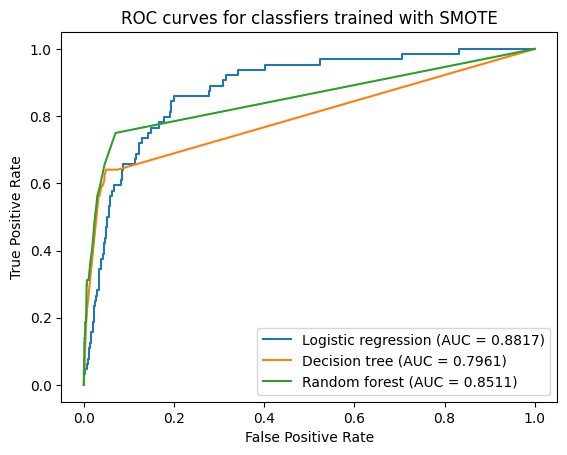

In [78]:
plot_roc_curves(
    "ROC curves for classfiers trained with SMOTE",
    (logreg_fpr, logreg_tpr, f"Logistic regression (AUC = {logreg_roc_auc:.4f})"),
    (dtree_fpr, dtree_tpr, f"Decision tree (AUC = {dtree_roc_auc:.4f})"),
    (forest_fpr, forest_tpr, f"Random forest (AUC = {forest_roc_auc:.4f})")
)

#### **Conclusion**

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below